In [ ]:
# ✅ Streamlit + Colab Setup (Error-free)
!pip install -q streamlit

import os
os.environ["PYTHONWARNINGS"] = "ignore"       # Hide Python warnings
os.environ["STREAMLIT_LOG_LEVEL"] = "error"   # Hide Streamlit info/warning logs

# Create Streamlit config file to disable usage statistics
!mkdir -p ~/.streamlit
with open(os.path.expanduser("~/.streamlit/config.toml"), "w") as f:
    f.write("[browser]\ngatherUsageStats = false\n")

print("✅ Streamlit setup complete (warnings suppressed, usage stats disabled)")

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

def create_ann(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

ann_model = create_ann(X_train.shape[1])
ann_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1)

# Evaluate
loss, accuracy = ann_model.evaluate(X_test, y_test)
print(f"ANN Test accuracy: {accuracy:.4f}")

In [3]:
from tensorflow.keras.layers import LSTM, Input

# Reshape data: each feature as a time step with 1 feature per step
X_train_rnn = X_train[..., np.newaxis]
X_test_rnn = X_test[..., np.newaxis]

def create_rnn(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(16),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

rnn_model = create_rnn((X_train_rnn.shape[1], 1))
rnn_model.fit(X_train_rnn, y_train, epochs=30, batch_size=16, validation_split=0.1)

loss, accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print(f"RNN Test accuracy: {accuracy:.4f}")

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6309 - loss: 0.6793 - val_accuracy: 0.8696 - val_loss: 0.5975
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8780 - loss: 0.5749 - val_accuracy: 0.9130 - val_loss: 0.4775
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8885 - loss: 0.4463 - val_accuracy: 0.8913 - val_loss: 0.3121
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8763 - loss: 0.3521 - val_accuracy: 0.9130 - val_loss: 0.2645
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8927 - loss: 0.3290 - val_accuracy: 0.9348 - val_loss: 0.2350
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8661 - loss: 0.3601 - val_accuracy: 0.8913 - val_loss: 0.2400
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9230 - loss: 0.2522 - val_accuracy: 0.9348 - val_loss: 0.2156
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9311 - loss: 0.2352 - val_accuracy: 0.9348 - val_loss: 0.

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9895 - loss: 0.0272 - val_accuracy: 0.9783 - val_loss: 0.0913
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9967 - loss: 0.0125 - val_accuracy: 0.9783 - val_loss: 0.0878
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9949 - loss: 0.0165 - val_accuracy: 0.9783 - val_loss: 0.0896
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0112 - val_accuracy: 0.9783 - val_loss: 0.0896
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9969 - loss: 0.0133 - val_accuracy: 0.9783 - val_loss: 0.0860
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9952 - loss: 0.0147 - val_accuracy: 0.9783 - val_loss: 0.0842
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9973 - loss: 0.0130 - val_accuracy: 0.9783 - val_loss: 0.0881
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9982 - loss: 0.0122 - val_accuracy: 0.9783 - val_loss:

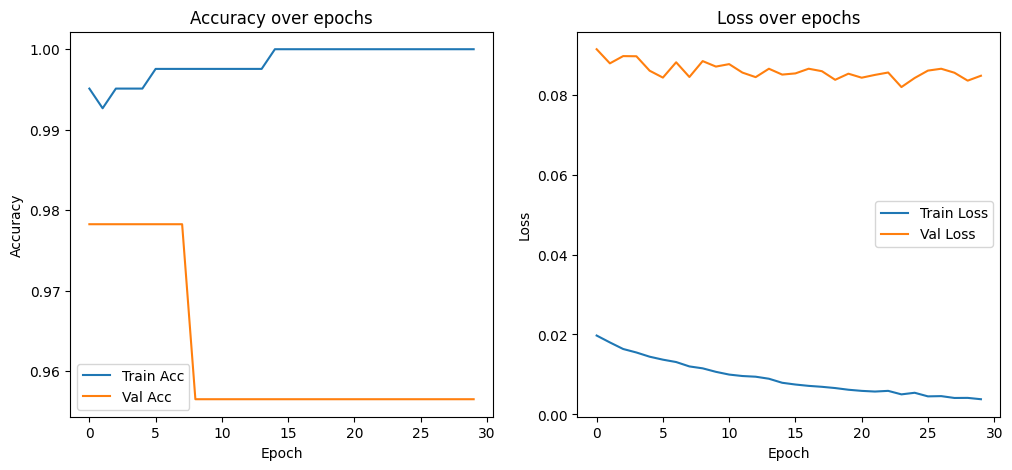

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Suppose you trained your model like this:
history = ann_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1)

# Plot accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


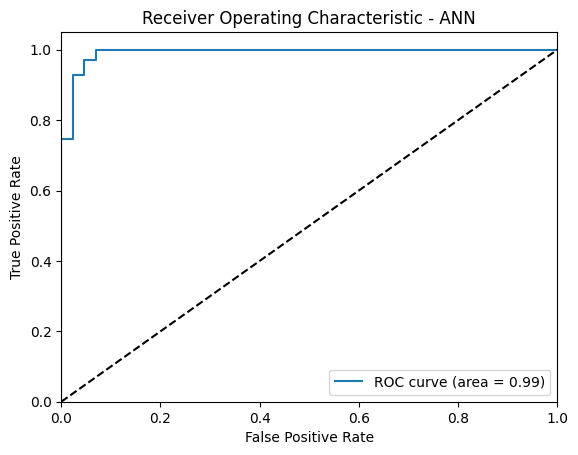

In [5]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for positive class
y_prob = ann_model.predict(X_test).ravel()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ANN')
plt.legend(loc="lower right")
plt.show()


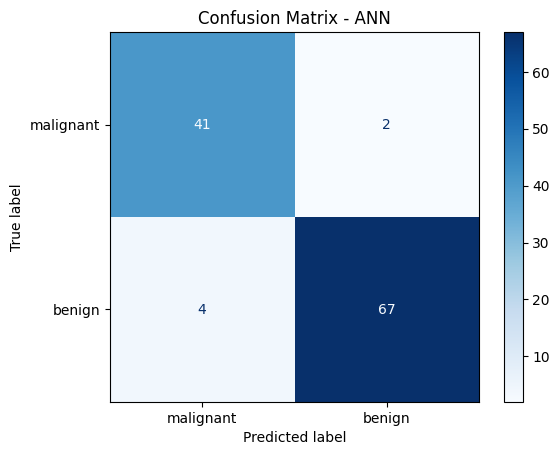

Classification Report - ANN
              precision    recall  f1-score   support

   malignant       0.91      0.95      0.93        43
      benign       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Binary classification threshold default 0.5
y_pred = (y_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - ANN")
plt.show()

print("Classification Report - ANN")
print(classification_report(y_test, y_pred, target_names=data.target_names))


In [7]:
# Predict probabilities on test set
y_prob_ann = ann_model.predict(X_test).ravel()
# Convert to class predictions (threshold 0.5)
y_pred_ann = (y_prob_ann > 0.5).astype(int)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_ann = accuracy_score(y_test, y_pred_ann)

print(f"ANN Test Accuracy: {accuracy_ann:.4f}")
print(f"ANN Predictions (first 10): {y_pred_ann[:10]}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
ANN Test Accuracy: 0.9474
ANN Predictions (first 10): [1 0 0 1 1 0 0 0 0 1]


In [8]:
y_prob_rnn = rnn_model.predict(X_test_rnn).ravel()
y_pred_rnn = (y_prob_rnn > 0.5).astype(int)

accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print(f"RNN Test Accuracy: {accuracy_rnn:.4f}")
print(f"RNN Predictions (first 10): {y_pred_rnn[:10]}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
RNN Test Accuracy: 0.9298
RNN Predictions (first 10): [1 0 0 1 1 0 0 0 0 1]


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)
roc_auc = roc_auc_score(y_test, y_prob_ann)

print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc:.4f}")


Precision: 0.9710, Recall: 0.9437, F1: 0.9571, ROC AUC: 0.9918


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = ann_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop]
)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9565 - val_loss: 0.0856
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9565 - val_loss: 0.0862
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9565 - val_loss: 0.0850
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9565 - val_loss: 0.0863
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9565 - val_loss: 0.0869
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9565 - val_loss: 0.0873
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9565 - val_loss: 0.0867
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9565 - v

In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = ann_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9565 - val_loss: 0.0865 - learning_rate: 0.0010
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9565 - val_loss: 0.0858 - learning_rate: 0.0010
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9565 - val_loss: 0.0855 - learning_rate: 0.0010
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9565 - val_loss: 0.0838 - learning_rate: 0.0010
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9565 - val_loss: 0.0853 - learning_rate: 0.0010
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.9565 - val_loss: 0.0859 - learning_rate: 0.0010
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0014 - val_ac

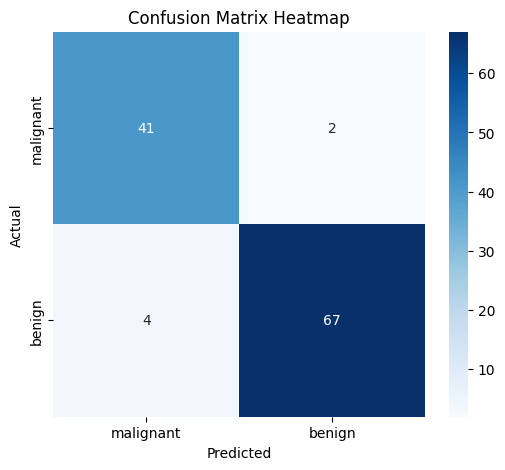

In [12]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


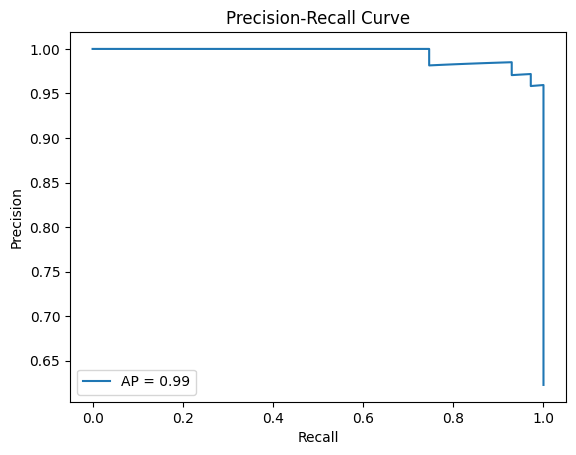

In [13]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [14]:
!pip install scikeras

In [15]:
accuracy = ann_model.evaluate(X_test, y_test)[1]
print(f"ANN Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9414 - loss: 0.1659 
ANN Test Accuracy: 0.9474


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


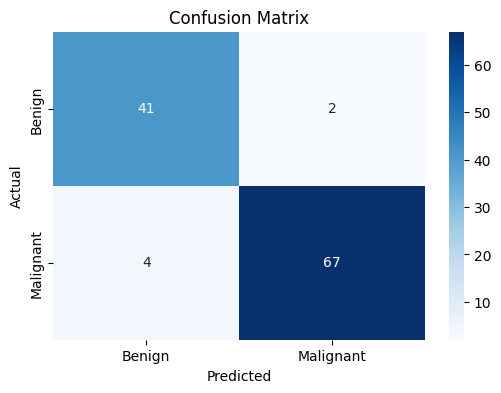


Classification Report:

              precision    recall  f1-score   support

      Benign       0.91      0.95      0.93        43
   Malignant       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



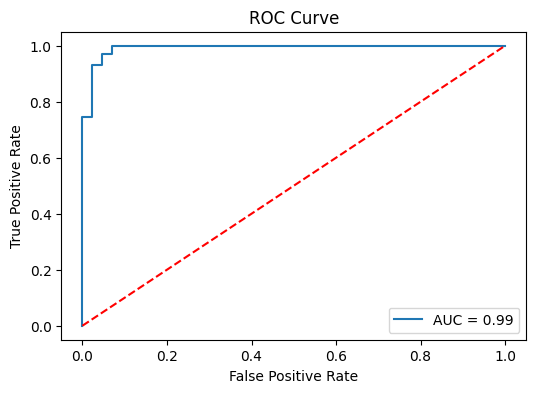

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# 1. Plot Confusion Matrix
y_pred = ann_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2. Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=["Benign", "Malignant"]))

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [17]:
!pip install streamlit

In [19]:
import joblib

# Save model
joblib.dump(ann_model, "breast_cancer_model.pkl")

# Load model (for testing)
loaded_model = joblib.load("breast_cancer_model.pkl")

In [20]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the scaler and the trained model
# Assuming the scaler was fit on the training data and saved
# For simplicity, we'll refit the scaler here. In a real app, save and load the fitted scaler.
data = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(data.data)


model = joblib.load("breast_cancer_model.pkl")

st.title("🩺 Breast Cancer Prediction App")

st.write("Enter patient details to check whether tumor is **Benign (No Cancer)** or **Malignant (Cancer)**.")

# Get all feature names
feature_names = data.feature_names

# Create number inputs for all features
input_features = {}
for feature in feature_names:
    input_features[feature] = st.number_input(feature.replace('_', ' ').title(), value=0.0) # Basic default value

# Collect inputs
input_data = np.array([[input_features[feature] for feature in feature_names]])

# Scale the input data
scaled_input_data = scaler.transform(input_data)

# Prediction
if st.button("Predict"):
    prediction = model.predict(scaled_input_data)
    result = "Malignant (Cancer)" if prediction[0] > 0.5 else "Benign (No Cancer)"

    st.subheader("Prediction Result:")
    # Display the result with appropriate styling
    if prediction[0] > 0.5:
        st.error(result)
    else:
        st.success(result)

2025-08-23 20:37:47.253 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 20:37:47.667 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-23 20:37:47.671 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 20:37:47.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 20:37:47.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 20:37:47.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 20:37:47.681 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 20:37:47.684 Thread 'MainThread': mi

In [21]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [22]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

# Load trained model
model = joblib.load("breast_cancer_model.pkl")

st.title("🩺 Breast Cancer Prediction App")

st.write("Enter patient details to check whether tumor is Benign (No Cancer) or Malignant (Cancer).")

mean_radius = st.number_input("Mean Radius", min_value=0.0, max_value=50.0, step=0.1)
mean_texture = st.number_input("Mean Texture", min_value=0.0, max_value=50.0, step=0.1)
mean_perimeter = st.number_input("Mean Perimeter", min_value=0.0, max_value=200.0, step=0.1)
mean_area = st.number_input("Mean Area", min_value=0.0, max_value=3000.0, step=1.0)
mean_smoothness = st.number_input("Mean Smoothness", min_value=0.0, max_value=1.0, step=0.001)

input_data = np.array([[mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness]])

if st.button("Predict"):
    prediction = model.predict(input_data)
    result = "Malignant (Cancer)" if prediction[0] == 1 else "Benign (No Cancer)"
    st.subheader("Prediction Result:")
    st.success(result)


Writing app.py


In [23]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.42.66.253:8501

  Stopping...
^C


In [24]:
!pip install streamlit pyngrok

# Run streamlit with a public URL
!streamlit run app.py & npx localtunnel --port 8501




⠙⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.42.66.253:8501

⠧⠇⠏⠋⠙your url is: https://blue-beers-obey.loca.lt
  Stopping...
^C
⠙⠹⠸⠼

⠴⠦⠧⠇⠏⠋⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.42.66.253:8501

⠸⠼⠴⠦your url is: https://thin-bats-fry.loca.lt
